In [1]:
# 데이터셋의 확인
from sklearn.datasets import load_iris
iris_dataset = load_iris()
type(iris_dataset)

sklearn.utils.Bunch

In [2]:
# Bunch의 내용물 확인
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
# 데이터셋의 설명서 확인
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# 분류해야 할 target의 이름
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
# target의 확인
print("Target:", iris_dataset['target'])

Target: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# 학습 데이터를 DataFrame으로 확인
import pandas as pd
iris_df = pd.DataFrame(iris_dataset['data'],  # 데이터
                      columns=iris_dataset['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
tnames = [iris_dataset['target_names'][i] for i in iris_dataset['target']]
target_df = pd.DataFrame(zip(iris_dataset['target'], tnames),
                        columns=['target', 'target_names'])
target_df

,target,target_names
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


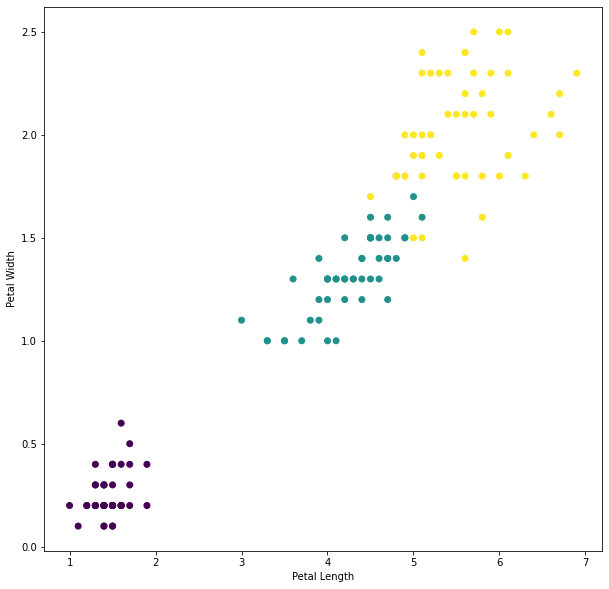

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(iris_df['petal length (cm)'],  # x축
           iris_df['petal width (cm)'],  # y축
           c = target_df['target']  # 색상
           )
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

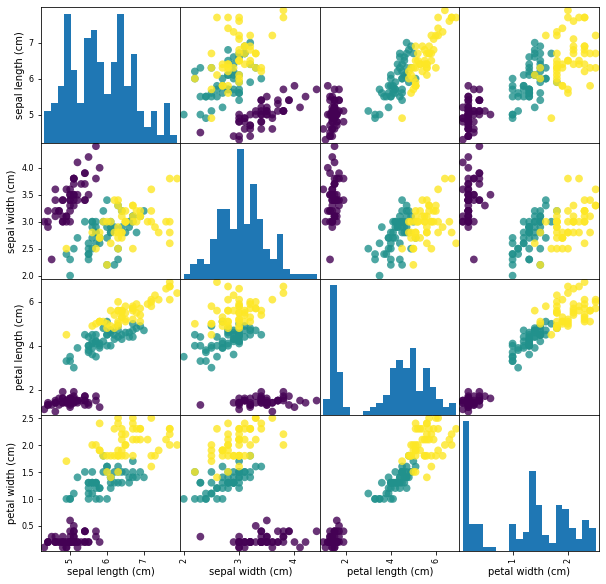

In [9]:
# 산점도 매트릭스
pd.plotting.scatter_matrix(iris_df,  # 데이터 셋
                          c=iris_dataset['target'],  # 각 데이터의 target으로 색상 구분
                          figsize=(10, 10),
                          marker='o',
                          hist_kwds={"bins":20},
                          s=60, alpha=.8
                          )
plt.show()

In [10]:
# 학습 데이터와 테스트 데이터 분할
from sklearn.model_selection import train_test_split
# 분할
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'],  # 데이터
    iris_dataset['target'],  # 라벨
    random_state=0
)

In [11]:
print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)
print("y_train size:", y_train.shape)
print("y_test size:", y_test.shape)

X_train size: (112, 4)
X_test size: (38, 4)
y_train size: (112,)
y_test size: (38,)


In [12]:
# 학습 진행
# kNN 알고리즘 사용
from sklearn.neighbors import KNeighborsClassifier
# 모델
knn = KNeighborsClassifier(n_neighbors=3)  # 이웃 3개를 기준으로 분류

In [13]:
knn.fit(X_train, y_train)  # 지도학습이니까 학습 데이터와 정답(라벨)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# 새로운 데이터를 이용한 품종의 예측
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])

prediction = knn.predict(X_new)
print("예측값:", prediction)
print("예측한 품종:", iris_dataset['target_names'][prediction])

예측값: [0]
예측한 품종: ['setosa']


In [15]:
# 평가(Evaluate)
# X_test(테스트 데이터셋)으로 예측
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:", y_pred)
print("테스트 세트 라벨(정답):", y_test)

테스트 세트에 대한 예측값: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 세트 라벨(정답): [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


In [16]:
# 정확도 판단
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트의 정확도: 0.97


In [17]:
# 정확도 판단(score)
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97
